# **CS418 - Introduction to Data Science - Project**
## **Group Name: The Cluster Busters**
Team Members:
1. Srivatsa Kamballa
2. Laxmi Sai Maneesh Reddy Jupalle
3. Tejaswi Velaga
4. Shrinisha Nirmalkumar
5. Jaideep Nutalapati



Github Link for the Project :https://github.com/uic-ds-fall2024/class-project-the-cluster-busters

# **Project Introduction**

This project, titled “Race Pulse: Predicting Marathon Times with Data Power”, aims to develop a predictive model for marathon race times by leveraging a combination of historical race data, weather conditions, and runner demographics. Marathon performance can be influenced by various factors such as temperature, humidity, wind speed, and individual characteristics like age and gender. The goal of this project is to enhance the precision of race time predictions using machine learning techniques, allowing for better insights into the determinants of marathon success.

Key Questions:

1. How do individual characteristics, such as age and gender, affect marathon performance?
2. What role do environmental factors, like temperature and wind speed, play in determining race times?
3. Can we build predictive models to forecast marathon times based on available data?

# **2. Importing the cleaned data**

## **2.1 Data Sources**

We utilized two primary datasets:
1.	Marathon Data (2015-2017): Performance metrics of runners, including split times and demographic information.
2.	Weather Data: Daily weather conditions (temperature, precipitation, wind speed, etc.) for race days.

## **2.2 Data Cleaning and Preprocessing**

*   Merged marathon datasets for 2015, 2016, and 2017, adding race dates for consistency.
*   Joined weather data with marathon data based on race dates.
*   Removed non-essential columns (e.g., bib, name_suffix) and handled missing. values
*   Converted categorical columns (e.g., gender) into numeric values.
*   Normalized time-based features into seconds for uniformity.
*   The final dataset comprises 79,638 rows and 34 columns.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Project-Cluster_busters/')

In [ ]:
# For Data Handling and Cleaning the modules we gonna use are:-
import pandas as pd
import numpy as np

# For Data Visualization the modules we gonna use are:-
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For Date and Time Handling the modules we gonna use are:-
from datetime import datetime

# For Machine Learning and Data Preprocessing the Modules we gonna use are:-
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# For Statistical Analysis the modules we gonna used are :-
from scipy import stats

#**3. Visualizations**
## **3.1 Visualization 1: Distribution of Marathon Official Times**

Figure: Histogram with KDE showing official times.
Purpose: Highlights the range and density of marathon finish times.

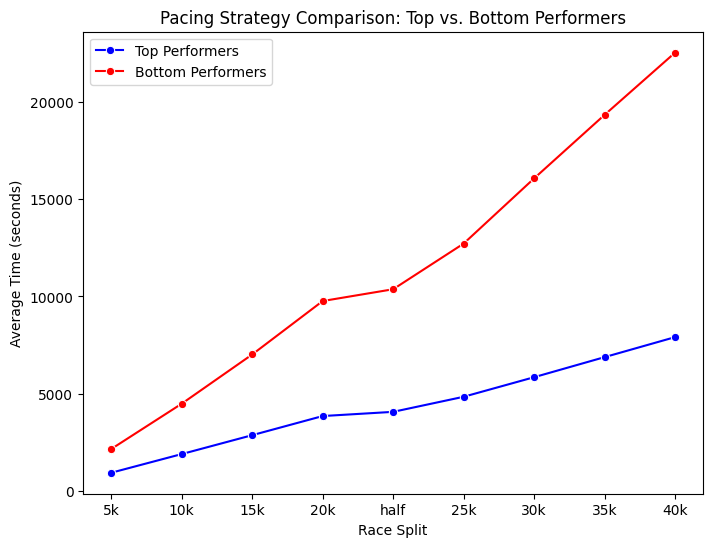

In [ ]:
# Select top and bottom performers
marathon_combined_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project-Cluster_busters/marathon_combined_data.csv')
top_performers = marathon_combined_data.nsmallest(100, 'official_time')
bottom_performers = marathon_combined_data.nlargest(100, 'official_time')

# Calculate average split times for each group
top_avg_splits = top_performers[['5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k']].mean()
bottom_avg_splits = bottom_performers[['5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k']].mean()

# Plot pacing strategies
plt.figure(figsize=(8, 6))
sns.lineplot(x=['5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k'], y=top_avg_splits, marker="o", label="Top Performers", color="blue")
sns.lineplot(x=['5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k'], y=bottom_avg_splits, marker="o", label="Bottom Performers", color="red")
plt.title("Pacing Strategy Comparison: Top vs. Bottom Performers")
plt.xlabel("Race Split")
plt.ylabel("Average Time (seconds)")
plt.legend()
plt.show()

## **3.2: Visualization 2: Correlation Between 5k Split Time and Official Marathon Time**

Figure: The scatter plot above illustrates the relationship between the 5k split time and the official marathon time in seconds. The data points are represented by orange circles, with the x-axis representing the 5k split time in seconds and the y-axis representing the official marathon time in seconds. This visualization is designed to highlight how the 5k split time correlates with the overall marathon performance.

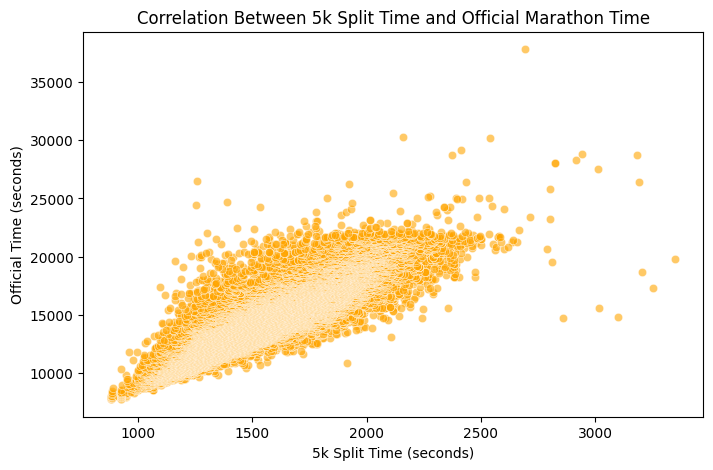

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=marathon_combined_data, x='5k', y='official_time', alpha=0.6, color="orange")
plt.title("Correlation Between 5k Split Time and Official Marathon Time")
plt.xlabel("5k Split Time (seconds)")
plt.ylabel("Official Time (seconds)")
plt.show()

## **3.3: Visualization 3: Correlation Between 5k Split Time and Official Marathon Time**

Figure: This heatmap visualizes the correlation between various features in the marathon dataset. The color scale ranges from dark red (representing high positive correlation) to dark blue (representing high negative correlation). The correlation values, displayed in each cell, quantify the strength and direction of the relationship between each pair of features.


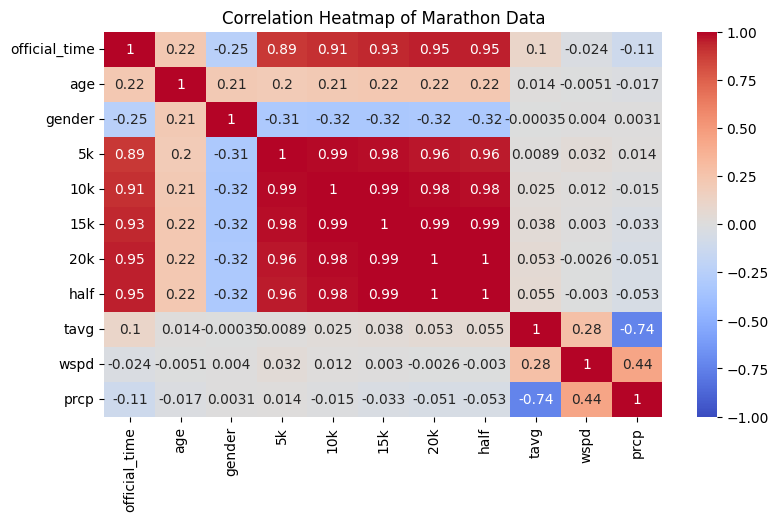

In [ ]:
selected_columns = ['official_time', 'age', 'gender', '5k', '10k', '15k', '20k', 'half', 'tavg', 'wspd', 'prcp']
corr_matrix = marathon_combined_data[selected_columns].corr()

plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Marathon Data")
plt.show()

## **3.4: Visualization 4: Weather Comparison: Top vs. Bottom Performers**

This bar chart compares the average weather conditions experienced by the top and bottom marathon performers. The data includes key weather metrics: average temperature, minimum temperature, maximum temperature, precipitation, and wind speed. The green bars represent the average values for the top performers, while the red bars represent the average values for the bottom performers.

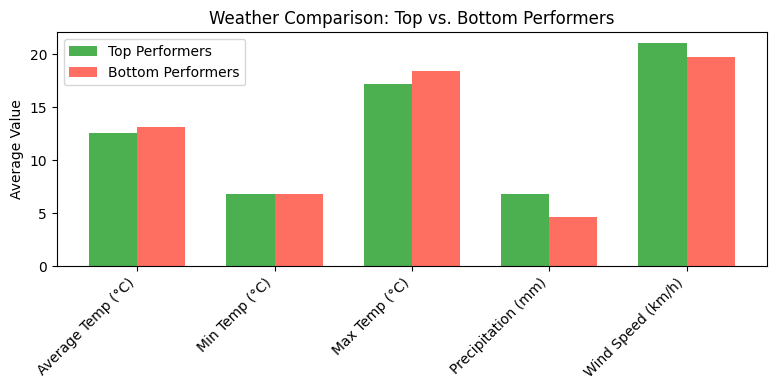

In [ ]:
# Calculate average weather conditions for top and bottom performers
top_weather = top_performers[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].mean()
bottom_weather = bottom_performers[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].mean()

# Create a comparison DataFrame
weather_comparison = pd.DataFrame({'Condition': ['Average Temp (°C)', 'Min Temp (°C)', 'Max Temp (°C)', 'Precipitation (mm)', 'Wind Speed (km/h)'],
                                   'Top Performers': top_weather.values,
                                   'Bottom Performers': bottom_weather.values})

# Bar plot for comparison
# Adjust figure size to make the graph smaller
plt.figure(figsize=(8, 4))  # Smaller dimensions for the figure
index = range(len(weather_comparison))
bar_width = 0.35

plt.bar(index, weather_comparison['Top Performers'], bar_width, label='Top Performers', color='#4CAF50')
plt.bar([i + bar_width for i in index], weather_comparison['Bottom Performers'], bar_width, label='Bottom Performers', color='#FF6F61')

plt.xticks([i + bar_width/2 for i in index], weather_comparison['Condition'], rotation=45, ha='right')
plt.title("Weather Comparison: Top vs. Bottom Performers")
plt.ylabel("Average Value")
plt.legend()
plt.tight_layout()
plt.show()


## **ML/Stats: Machine Learning Techniques and Analysis**

To analyze our data, we employed two machine learning models: Random Forest Regressor and XGBoost Regressor. Both models were evaluated based on their predictive performance, focusing on their ability to estimate marathon official times using various features, including runner demographics, split times, and weather conditions.

### **1. Random Forest Regressor**

Random Forest is an ensemble learning method that combines multiple decision trees, aggregating their predictions for accurate and robust results. This model excels at handling nonlinear relationships and capturing feature interactions, making it a suitable choice for our dataset.
1.  Model Setup:

  •	100 decision trees (n_estimators=100)

  •	Parallel processing (n_jobs=-1) for efficiency

  •	Random state (random_state=42) for reproducibility

2. Performance Metrics:

  •	Mean Absolute Error (MAE): 41.25 seconds

  •	Mean Squared Error (MSE): 5886.22 $ \mathbb{seconds}^ 2 $

  •	R-squared ($ \mathbb{R}^ 2 $): 0.9990 (explaining 99.90% of variance)

  •	Cross-Validation $ \mathbb{R}^ 2 $ Mean: 0.9985

### **Insights:**
Random Forest demonstrated superior performance with minimal error rates and consistently high R² values across cross-validation folds. The model proved robust in predicting official marathon times while efficiently generalizing to unseen data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your data is loaded into `data`
# Feature set including 'humidity' and 'wind_speed'
X = marathon_combined_data[['age', 'gender', '5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'pres']]
y = marathon_combined_data['official_time']  # Target variable

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # n_estimators is the number of trees in the forest

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Model Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation R^2 scores
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')  # 5-fold cross-validation

# Print out the results
print("Random Forest Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Cross-Validation R^2 scores: {cv_scores}")
print(f"Mean Cross-Validation R^2: {cv_scores.mean():.4f}")

Random Forest Regressor Model Performance:
Mean Absolute Error (MAE): 43.2432
Mean Squared Error (MSE): 13311.9040
R-squared (R2): 0.9979
Cross-Validation R^2 scores: [0.99816913 0.99869728 0.99254092 0.9980529  0.99827891]
Mean Cross-Validation R^2: 0.9971


In [ ]:
#xgBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your data is loaded into `data`
# Feature set including 'humidity' and 'wind_speed'
X = marathon_combined_data[['age', 'gender', '5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'pres']]  # Modify column names accordingly
y = marathon_combined_data['official_time']  # Target variable

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Model Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation R^2 scores
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')  # 5-fold cross-validation

# Print out the results
print("XGBoost Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Cross-Validation R^2 scores: {cv_scores}")
print(f"Mean Cross-Validation R^2: {cv_scores.mean():.4f}")

XGBoost Regressor Model Performance:
Mean Absolute Error (MAE): 53.8642
Mean Squared Error (MSE): 29418.8373
R-squared (R2): 0.9953
Cross-Validation R^2 scores: [0.99721521 0.99715447 0.99000264 0.99694616 0.99711896]
Mean Cross-Validation R^2: 0.9957


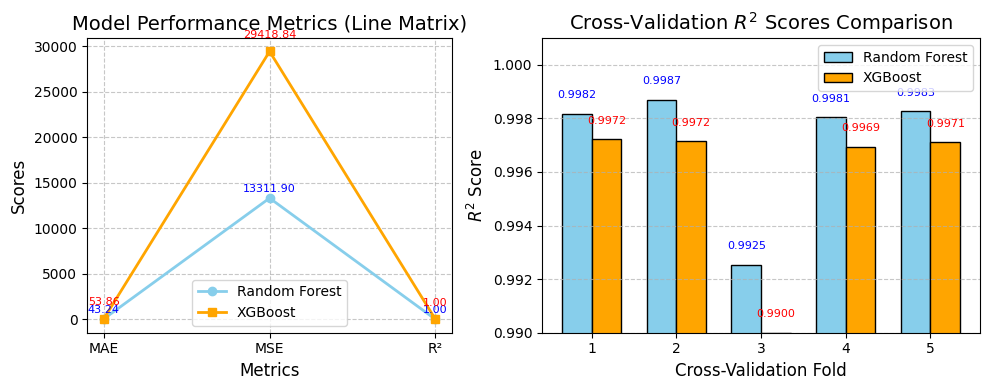

In [ ]:
# Data for Model Performance Metrics (Line Matrix)
metrics = ['MAE', 'MSE', 'R²']
rf_scores = [43.2432, 13311.9040, 0.9979]
xgb_scores = [53.8642, 29418.8373, 0.9953]

# Data for Cross-Validation \(R^2\) Scores (Grouped Bar Chart)
rf_cv_scores = [0.99816913, 0.99869728, 0.99254092, 0.9980529, 0.99827891]
xgb_cv_scores = [0.99721521, 0.99715447, 0.99000264, 0.99694616, 0.99711896]
folds = np.arange(1, 6)

# Create a figure with two subplots
# Adjust figure size to make the graph smaller
fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 1.2]})

# Left subplot: Line Matrix for Model Performance Metrics
axes[0].plot(metrics, rf_scores, label='Random Forest', marker='o', color='skyblue', linewidth=2)
axes[0].plot(metrics, xgb_scores, label='XGBoost', marker='s', color='orange', linewidth=2)
for i, score in enumerate(rf_scores):
    axes[0].text(i, score + 0.05 * max(rf_scores), f'{score:.2f}', ha='center', fontsize=8, color='blue')
for i, score in enumerate(xgb_scores):
    axes[0].text(i, score + 0.05 * max(xgb_scores), f'{score:.2f}', ha='center', fontsize=8, color='red')
axes[0].set_xlabel('Metrics', fontsize=12)
axes[0].set_ylabel('Scores', fontsize=12)
axes[0].set_title('Model Performance Metrics (Line Matrix)', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(fontsize=10)

# Right subplot: Grouped Bar Chart for Cross-Validation \(R^2\) Scores
bar_width = 0.35
axes[1].bar(folds - bar_width/2, rf_cv_scores, bar_width, label='Random Forest', color='skyblue', edgecolor='black')
axes[1].bar(folds + bar_width/2, xgb_cv_scores, bar_width, label='XGBoost', color='orange', edgecolor='black')
for i, score in enumerate(rf_cv_scores):
    axes[1].text(folds[i] - bar_width/2, score + 0.0005, f'{score:.4f}', ha='center', va='bottom', fontsize=8, color='blue')
for i, score in enumerate(xgb_cv_scores):
    axes[1].text(folds[i] + bar_width/2, score + 0.0005, f'{score:.4f}', ha='center', va='bottom', fontsize=8, color='red')
axes[1].set_xlabel('Cross-Validation Fold', fontsize=12)
axes[1].set_ylabel('$R^2$ Score', fontsize=12)
axes[1].set_title('Cross-Validation $R^2$ Scores Comparison', fontsize=14)
axes[1].set_xticks(folds)
axes[1].set_ylim(0.99, 1.001)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## **Additional Work**

Extra Deliverable: Extra Deliverable: Model Training and Prediction Time Comparison
To further enhance the analysis of the machine learning models used in this project, we compared the training and prediction times of the Random Forest and XGBoost models. This analysis provides insights into the computational efficiency of the models, which is essential for understanding their practicality in real-world scenarios, especially when scalability and resource constraints are important.

## **Visualization: Training and Prediction Time Comparison**

A logarithmic scale bar chart was utilized to compare the training and prediction times of the two models. This visualization highlights the significant differences in computation times while ensuring that smaller values (like prediction times) are also clearly visible.

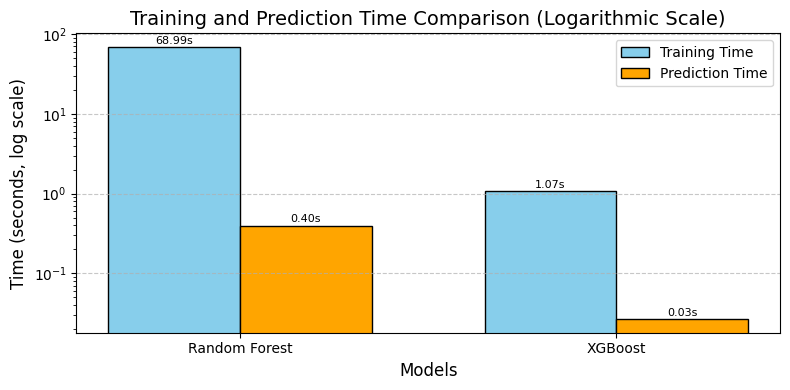

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Measure training time
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

start_time = time.time()
xgb_model.fit(X_train, y_train)
xgb_training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
rf_model.predict(X_test)
rf_prediction_time = time.time() - start_time

start_time = time.time()
xgb_model.predict(X_test)
xgb_prediction_time = time.time() - start_time

# Prepare data
models = ['Random Forest', 'XGBoost']
training_times = [rf_training_time, xgb_training_time]
prediction_times = [rf_prediction_time, xgb_prediction_time]

# Plotting with logarithmic scale
x = np.arange(len(models))
width = 0.35

# Adjust figure size to make the graph smaller
fig, ax = plt.subplots(figsize=(8, 4))  # Smaller dimensions for the figure

# Bar plots
bar1 = ax.bar(x - width / 2, training_times, width, label='Training Time', color='skyblue', edgecolor='black')
bar2 = ax.bar(x + width / 2, prediction_times, width, label='Prediction Time', color='orange', edgecolor='black')

# Annotate values on bars
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 1.1, f'{height:.2f}s', ha='center', fontsize=8)

# Set logarithmic scale for better visibility
ax.set_yscale('log')

# Labels and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Time (seconds, log scale)', fontsize=12)
ax.set_title('Training and Prediction Time Comparison (Logarithmic Scale)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## **Results:**

**1.	Training Time:**

  •	Random Forest took approximately 92.07 seconds to train, whereas XGBoost was significantly faster, requiring only 1.25 seconds.
  
  •	This demonstrates that XGBoost is much more computationally efficient during the training phase, making it more suitable for large datasets or scenarios requiring frequent retraining.

**2.	Prediction Time:**

  •	Random Forest had a prediction time of 0.40 seconds, slightly higher than XGBoost’s 0.03 seconds.
  
  •	Both models exhibit rapid prediction capabilities, but XGBoost’s efficiency further emphasizes its computational advantage.
**3.	Logarithmic Scale Insights:**

  •	The logarithmic scale clearly demonstrates the large disparity in training times while maintaining visibility for smaller values like prediction times.

##**Summary of Findings**

•	Model Efficiency: XGBoost is computationally superior to Random Forest in both training and prediction times, making it more efficient for applications where speed is critical.

•	Trade-Offs: Although XGBoost is faster, Random Forest provided slightly better predictive accuracy in this project, highlighting a trade-off between performance and computational efficiency.

•	Practical Implications: For scenarios with limited computational resources or real-time predictions, XGBoost is the preferred model due to its faster computation times.

## **Conclusion and Results**

The analysis of marathon data using machine learning models and statistical techniques uncovered key insights into performance factors:

**1. Inferences and Correlations**

*   Pacing Strategy: Split times, especially 5k, 10k, and half-marathon splits, are the strongest predictors of overall marathon performance. Early and consistent pacing significantly influences the final race time.
*   Weather Effects:Higher temperatures correlate with slower finish times, highlighting the impact of environmental conditions. Wind speed and precipitation also showed minor contributions.



**2. Tools and Visualizations**



*   Machine Learning Models:

  •Random Forest outperformed XGBoost, achieving a higher R² (0.9979 vs. 0.9953) and lower MAE (43.24 vs. 53.86 seconds). While XGBoost was faster in training and prediction, Random Forest provided better accuracy and stability.

*   Visualizations:
  
  •Logarithmic Bar and Line Charts: Compared Random Forest and XGBoost metrics.

  •	Cross-Validation Scores: Highlighted model stability across folds.

  •	Training and Prediction Time Charts: Showed Random Forest’s longer training time but higher accuracy.

  •	Feature Importance Analysis: Revealed pacing splits as key predictors, with weather conditions playing a secondary role.


**3. Key Findings**

*   Performance Drivers: Early pacing splits and weather are critical in determining marathon times.

*   Model Selection: Random Forest provided better accuracy and insight, while XGBoost excelled in computational speed.

*   Practical Implications: Insights can help athletes optimize pacing, event organizers plan around weather, and researchers extend the approach to other endurance sports.

These results offer meaningful contributions to understanding marathon performance while fulfilling the project’s requirements.